# My goal is to predict the weekly sales of that department


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as ticker
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
%matplotlib inline

In [3]:
%cd Data/

C:\Users\Anas\Walmart Sales\Data


In [4]:
features = pd.read_csv('features.csv')
data = pd.read_csv("train.csv")

In [5]:
data.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [6]:
features.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [7]:
features.dtypes 

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

In [8]:
data.shape

(421570, 5)

In [9]:
print(data.head())

   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False


In [10]:
len(data['Dept'].unique())

81

In [11]:
data['Date'] = pd.to_datetime(data['Date'])

In [12]:
# create a new DataFrame with the weeks as rows, departments as columns, and sales as values
sales_by_week_dept_store = data.pivot_table(index='Date', columns=['Dept', 'Store'], values='Weekly_Sales')

sales_by_week_dept_store.head()

Dept              1                                                     \
Store             1         2         3         4         5         6    
Date                                                                     
2010-02-05  24924.50  35034.06   6453.58  38724.42   9323.89  25619.00   
2010-02-12  46039.49  60483.70  12748.72  69872.44  16861.10  43749.81   
2010-02-19  41595.55  58221.52   8918.31  49937.09  11417.67  34750.82   
2010-02-26  19403.54  25962.32   4992.00  30107.54   7168.41  19896.08   
2010-03-05  21827.90  27372.05   5172.73  31580.69   8344.13  22839.36   

Dept                                                ...  99                  \
Store             7         8         9         10  ...  33  34  36  37  38   
Date                                                ...                       
2010-02-05   8970.97  16181.89  12861.40  40212.84  ... NaN NaN NaN NaN NaN   
2010-02-12  14026.65  34262.09  20273.94  67699.32  ... NaN NaN NaN NaN NaN   
2010-02-19  12477.79  22319.25  14819.97  49748.33  ... NaN NaN NaN NaN NaN   
2010-02-26   8602.73  11722.71  10530.98  33601.22  ... NaN NaN NaN NaN NaN   
2010-03-05   9541.12  12979.74  10438.47  36572.44  ... NaN NaN NaN NaN NaN   

Dept                                
Store         39  40  41  43    44  
Date                                
2010-02-05   NaN NaN NaN NaN   NaN  
2010-02-12   NaN NaN NaN NaN   NaN  
2010-02-19   NaN NaN NaN NaN   NaN  
2010-02-26   NaN NaN NaN NaN   NaN  
2010-03-05  0.01 NaN NaN NaN  0.01  

[5 rows x 3331 columns]

In [13]:
sales_by_week_dept_store.describe()

Dept             1                                                           \
Store            1             2             3             4             5    
count    143.000000    143.000000    143.000000    143.000000    143.000000   
mean   22513.322937  30777.980769   7328.621049  36979.940070   9774.553077   
std     9854.349032  14320.969926   3116.986263  15156.690657   2705.111126   
min    14537.370000  19092.940000   3440.690000  23961.800000   6694.810000   
25%    16494.630000  22836.425000   5130.170000  27470.455000   8098.020000   
50%    18535.480000  24826.250000   6673.830000  30977.960000   9078.610000   
75%    23214.215000  30310.850000   8254.410000  38457.165000  10259.915000   
max    57592.120000  82766.070000  18969.050000  91965.850000  21113.020000   

Dept                                                                          \
Store            6             7             8             9              10   
count    143.000000    143.000000    143.000000    143.000000     143.000000   
mean   23867.553776   9542.801259  14789.827343  11846.558252   39925.138951   
std     9950.089558   3007.674435   7499.892981   4280.462419   23688.629825   
min    13951.760000   5589.620000   8113.010000   7789.720000   23444.710000   
25%    18151.160000   7764.880000  10146.430000   9192.850000   26577.585000   
50%    19952.170000   8719.240000  12305.830000  10365.440000   30345.610000   
75%    24949.180000  10049.785000  15862.055000  12465.760000   39575.265000   
max    62544.570000  24797.060000  48385.220000  27993.330000  140537.200000   

Dept   ...        99                                                   \
Store  ...        33           34    36         37    38           39   
count  ...  5.000000    37.000000  1.00   3.000000   1.0    41.000000   
mean   ...  0.022000   347.144324  0.02  15.000000  25.0   334.869756   
std    ...  0.010954   787.545803   NaN   8.660254   NaN   638.880496   
min    ...  0.010000    -9.000000  0.02  10.000000  25.0     0.010000   
25%    ...  0.020000     8.960000  0.02  10.000000  25.0    40.000000   
50%    ...  0.020000    50.000000  0.02  10.000000  25.0    90.000000   
75%    ...  0.020000   250.000000  0.02  17.500000  25.0   295.000000   
max    ...  0.040000  3550.000000  0.02  25.000000  25.0  3280.000000   

Dept                                                  
Store           40           41         43        44  
count    36.000000    43.000000   4.000000  2.000000  
mean    167.374167   443.736512  26.250000  3.505000  
std     298.953977   844.743633  18.427787  4.942676  
min       0.020000     0.010000   5.000000  0.010000  
25%       7.517500    29.880000  20.000000  1.757500  
50%      55.000000    70.000000  25.000000  3.505000  
75%     177.500000   412.500000  31.250000  5.252500  
max    1470.000000  3280.000000  50.000000  7.000000  

[8 rows x 3331 columns]

In [14]:
Total_sales = sales_by_week_dept_store.sum(axis=0).sort_values(ascending=False)
Total_sales

Dept  Store
92    14       26101497.71
      2        23572153.03
      20       23542625.04
      13       23170876.20
      4        22789210.43
                  ...     
47    45          -1061.04
72    42          -1209.93
47    10          -2329.00
      1           -2562.00
      35          -3567.18
Length: 3331, dtype: float64

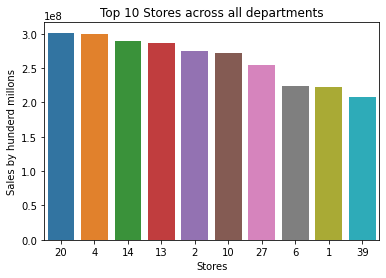

In [16]:
#top stores in sales over time 
Stores_sales = Total_sales.groupby('Store').sum()
Top_stores = Stores_sales.sort_values(ascending=False)[:10]
sns.barplot(x= Top_stores.index ,y = Top_stores.values , order = Top_stores.index )
plt.title("Top 10 Stores across all departments")
plt.xlabel("Stores")
plt.ylabel('Sales by hunderd millons')
plt.show()

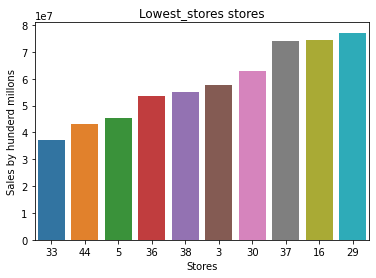

In [18]:
#Lowest_stores store across them 
Lowest_stores_stores  = Stores_sales.sort_values(ascending= True)[:10]
sns.barplot(x= Lowest_stores.index ,y = Lowest_stores.values , order = Lowest_stores.index )
plt.title("Lowest_stores stores")
plt.xlabel("Stores")
plt.ylabel('Sales by hunderd millons')
plt.show()

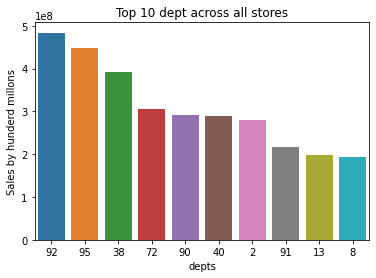

In [20]:
#top departments across all stores 
Dept_sales =  Total_sales.groupby('Dept').sum()
Top_depts = Dept_sales.sort_values(ascending=False)[:10]

sns.barplot(x= Top_depts.index ,y = Top_depts.values , order = Top_depts.index )
plt.title("Top 10 dept across all stores")
plt.xlabel("depts")
plt.ylabel('Sales by hunderd millons')
plt.show()

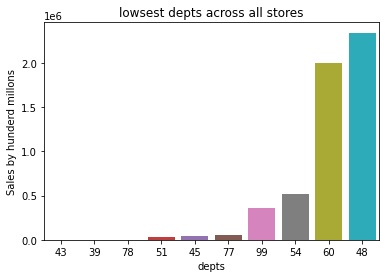

In [23]:
#lowest departments across all stores 
Lowest_dept = Dept_sales.loc[Dept_sales > 0].sort_values(ascending=True)[:10]
sns.barplot(x= Lowest_dept.index ,y = Lowest_dept.values , order = Lowest_dept.index )
plt.title("lowsest depts across all stores")
plt.xlabel("depts")
plt.ylabel('Sales by hunderd millons')
plt.show()

In [24]:
Total_sales.loc[Lowest_dept.index,:].describe()

count       302.000000
mean      17712.025795
std       42827.036678
min        -152.320000
25%         104.370000
50%        1405.825000
75%       14091.707500
max      327770.790000
dtype: float64

In [25]:
def plot_departments_trend(index,data):
    plt.style.use('seaborn')
    fig, ax = plt.subplots(figsize=(10,5))

    for i in index:
        plt.plot(data[i]  ,label = i)
        
        
    plt.legend(index)
    plt.title(f"Sales for {len(index)} sales departments ")
    plt.xlabel("Week")
    plt.ylabel("Sales")
    
    xticks =pd.date_range(start=data.index.min(), end=data.index.max())
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    
#     ax.tick_params(xticks, labelrotation=45)
    

    

In [32]:
fig , axs = plt.subplot(nrows = 1,ncols = 2)



ax[0].plot_departments_trend( Total_sales.loc[Top_depts.index[:2]  ,Top_stores.index[:2]].index , sales_by_week_dept_store)
ax[1] .plot_departments_trend( Total_sales.loc[Top_depts.index[2:4],Top_stores.index[2:4]].index , sales_by_week_dept_store)
plt.show()

TypeError: subplot() got an unexpected keyword argument 'ncols' and/or 'nrows'.  Did you intend to call subplots()?

In [45]:
plot_departments_trend( Total_sales.loc[Lowest_dept.index[:3]  ,Lowest_stores.index[:3]].index , sales_by_week_dept_store)

(Int64Index([43, 39, 78], dtype='int64', name='Dept'),
 Int64Index([33, 44, 5], dtype='int64', name='Store'))

In [22]:
Total_sale sTotal_sales.loc[(Total_sales.index.unique(level=0)[:5] )  , range(1,5)]

Dept  Store
92    14       26101497.71
      2        23572153.03
      20       23542625.04
      13       23170876.20
      4        22789210.43
                  ...     
47    45          -1061.04
72    42          -1209.93
47    10          -2329.00
      1           -2562.00
      35          -3567.18
Length: 3331, dtype: float64

In [25]:
(Total_sales.index.unique(level=0)[:3] )

Int64Index([92, 95, 72], dtype='int64', name='Dept')

In [ ]:
#top sales departments
plot_departments_trend(Total_sales.head(5), sales_by_week_dept_store)

Lets explore the top weeks of sales

In [ ]:
def autocorrplot(nrows , ncols, size , data ,index , lags , type = plot_acf ):
    
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize= size)

    for i , (x , j) in enumerate(index):
        if  i < nrows * ncols :
            row =  i // ncols
            col = i % ncols 
            type(data[x, j ] , ax[row , col ], lags=lags)
            ax[row , col].set_ylabel("Autocorrelation")
            ax[row , col].set_title(f"Autocorrelation plot for dept {x} store {j}")
        

    plt.tight_layout()
        
    return plt.show()


In [ ]:
index = Total_sales.loc[(Total_sales.index.unique(level=0)[:5] )  , range(1,5)] 
index = index.index
autocorrplot(3 , 3, (10 , 10) , sales_by_week_dept_store, index , 52)

In [ ]:
#partial auto correlation 
autocorrplot(3 , 3, (10 ,10 ) , sales_by_week_dept_store, index , 52 ,type = plot_pacf)